# Aircraft Risk Analysis Project - Phase 1

## Introduction


In today's fast-evolving business landscape, diversification remains crucial to maintaining a competitive edge. This project focuses on a company exploring expansion into the aviation industry, an area with both tremendous potential and inherent operational risks. Safety, in particular, is a critical factor for new entrants who lack direct aviation experience.

Using real world aviation incident and survivability data, this project aims to guide investment decisions by highlighting aircraft models that offer the highest levels of safety and operational reliability. Through a careful examination of historical accident records, survivability outcomes, and aircraft safety scores, i provide a clear and data-driven assessment of which models are best suited for strategic fleet acquisition.

Beyond serving as a business case, this project also demonstrates key data science skills including data cleaning,dealing missing value, trend analysis, risk evaluation, and visualization. The final deliverables include actionable insights, a prioritized list of recommended aircraft, and an interactive dashboard designed to empower the company's new aviation division with evidence-based decision-making tools.



## Objectives

- Analyze historical aircraft accident and survivability data to understand operational risk profiles.
- Identify and rank aircraft models based on comprehensive safety performance metrics.
- Perform robust data cleaning, missing value handling, and data integration.
- Uncover trends in incident severity and survivability across different aircraft types.
- Present findings through clear visualizations and a summarized, stakeholder-friendly format.
- Build an interactive dashboard to support investment decisions with real-time insights.

## Data Source

The dataset comes from the National Transportation Safety Board (NTSB) and includes records of civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023.

## Tools & Libraries

- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Jupyter Notebook
- Data cleaning and wrangling
- Exploratory data analysis (EDA)

### Step 1 : Import Libraries

In [59]:
#Importing libraries using standard alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

### Step 2 : Load and Inspect Data

In [60]:
#Loading the csv file into the notebook
#Adding low_memory=False to allow pandas to read the full file before deciding datatypes
#Telling pandas to treat ? , Unknown , N/A and blank spaces as missing values
data= pd.read_csv('data/Aviation_Data.csv', low_memory=False, na_values=['?', 'Unknown', 'N/A', ''])

#Inspect the first 5 rows of the dataset
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,NaN,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [61]:
# Checking the number of rows and columns in the dataset
data.shape

# Displaying the dataset's dimensions (rows, columns)
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 90348 rows and 31 columns.


In [62]:
# Getting a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88836 non-null  object 
 5   Country                 88660 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52783 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85576 non-null  object 
 12  Aircraft.Category       32273 non-null  object 
 13  Registration.Number     87569 non-null  object 
 14  Make                    88805 non-null

In [63]:
#Looking at all columns present
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [64]:
#Getting a summary statistics for numerical columns in the dataset
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Step 3 : Data Cleaning

In [65]:
# Creating a copy of the cleaned DataFrame to avoid modifying the original
cleaned_data = data.copy()

In [66]:
#Inspecting cleaned data
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88836 non-null  object 
 5   Country                 88660 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52783 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85576 non-null  object 
 12  Aircraft.Category       32273 non-null  object 
 13  Registration.Number     87569 non-null  object 
 14  Make                    88805 non-null

In [67]:
#Changing the Event.Date and Publication.Date columns into datetime
cleaned_data['Event.Date']=pd.to_datetime(cleaned_data['Event.Date'])
cleaned_data['Publication.Date']=pd.to_datetime(cleaned_data['Publication.Date'])

#Checking if it has been applied
cleaned_data[['Event.Date','Publication.Date']].head()

,Event.Date,Publication.Date
0,1948-10-24,NaT
1,1962-07-19,1996-09-19
2,1974-08-30,2007-02-26
3,1977-06-19,2000-12-09
4,1979-08-02,1980-04-16


In [68]:
# Checking if there are any duplicate rows
cleaned_data.duplicated().any()

True

In [69]:
# Droping duplicated rows and keeping the first occurrence
cleaned_data = cleaned_data.drop_duplicates()

#Checking dimensions of our cleaned data after duplicates have been dropped
cleaned_data.shape
print(f"The Cleaned dataset contains {cleaned_data.shape[0]} rows and {cleaned_data.shape[1]} columns.")

The Cleaned dataset contains 88958 rows and 31 columns.


In [70]:
#Grouping the numerical values and fill them with the mean
numeric_values = cleaned_data.select_dtypes(include=[float, int]).columns
cleaned_data[numeric_values] = cleaned_data[numeric_values].fillna(cleaned_data[numeric_values].mean())

In [71]:
#Checking for any null values in the numerical values
cleaned_data[numeric_values].isna().sum()

Number.of.Engines         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [72]:
# Selecting all object and datetime columns
categorical_values = cleaned_data.select_dtypes(include=['object', 'datetime64[ns]']).columns

# Looping through each column and filling missing values with the mode
for column in categorical_values:
    mode_series = cleaned_data[column].mode()

    # Only fills if the mode exists
    if not mode_series.empty:
        mode_value = mode_series.iloc[0]
        cleaned_data[column] = cleaned_data[column].fillna(mode_value)


In [73]:
#Check for any null values in the categoriacal values
cleaned_data[categorical_values].isna().sum()

Event.Id                 0
Investigation.Type       0
Accident.Number          0
Event.Date               0
Location                 0
Country                  0
Latitude                 0
Longitude                0
Airport.Code             0
Airport.Name             0
Injury.Severity          0
Aircraft.damage          0
Aircraft.Category        0
Registration.Number      0
Make                     0
Model                    0
Amateur.Built            0
Engine.Type              0
FAR.Description          0
Schedule                 0
Purpose.of.flight        0
Air.carrier              0
Weather.Condition        0
Broad.phase.of.flight    0
Report.Status            0
Publication.Date         0
dtype: int64

In [74]:
# Looping through each categorical column and applying strip() for each column
for column in categorical_values:
    # Converting the column to string type first, then applying strip() and making them lowercase
    cleaned_data[column] = cleaned_data[column].astype(str).str.strip().str.capitalize()

In [75]:
# Selecting numeric and categorical data by column names, then combining them back into one DataFrame
numerical_data = cleaned_data[numeric_values]
categorical_data = cleaned_data[categorical_values]
cleaned_data = pd.concat([numerical_data, categorical_data], axis=1)

#Checking the 1st 5 rows of the cleaned data
cleaned_data.head()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,1.000000,2.0,0.000000,0.000000,0.00000,20001218x45444,Accident,Sea87la080,1948-10-24,"Moose creek, id",...,No,Reciprocating,091,Nsch,Personal,Pilot,Unk,Cruise,Probable cause,2020-09-25
1,1.000000,4.0,0.000000,0.000000,0.00000,20001218x45447,Accident,Lax94la336,1962-07-19,"Bridgeport, ca",...,No,Reciprocating,091,Nsch,Personal,Pilot,Unk,Landing,Probable cause,1996-09-19
2,1.000000,3.0,0.279881,0.357061,5.32544,20061025x01555,Accident,Nyc07la005,1974-08-30,"Saltville, va",...,No,Reciprocating,091,Nsch,Personal,Pilot,Imc,Cruise,Probable cause,2007-02-26
3,1.000000,2.0,0.000000,0.000000,0.00000,20001218x45448,Accident,Lax96la321,1977-06-19,"Eureka, ca",...,No,Reciprocating,091,Nsch,Personal,Pilot,Imc,Cruise,Probable cause,2000-12-09
4,1.146585,1.0,2.000000,0.357061,0.00000,20041105x01764,Accident,Chi79fa064,1979-08-02,"Canton, oh",...,No,Reciprocating,091,Nsch,Personal,Pilot,Vmc,Approach,Probable cause,1980-04-16


In [76]:
#checking the data in the make column
cleaned_data['Make'].head(10)

0              Stinson
1                Piper
2               Cessna
3             Rockwell
4               Cessna
5    Mcdonnell douglas
6               Cessna
7               Cessna
8               Cessna
9       North american
Name: Make, dtype: object

In [77]:
#Inspecting information about the data after cleaning
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Number.of.Engines       88958 non-null  float64
 1   Total.Fatal.Injuries    88958 non-null  float64
 2   Total.Serious.Injuries  88958 non-null  float64
 3   Total.Minor.Injuries    88958 non-null  float64
 4   Total.Uninjured         88958 non-null  float64
 5   Event.Id                88958 non-null  object 
 6   Investigation.Type      88958 non-null  object 
 7   Accident.Number         88958 non-null  object 
 8   Event.Date              88958 non-null  object 
 9   Location                88958 non-null  object 
 10  Country                 88958 non-null  object 
 11  Latitude                88958 non-null  object 
 12  Longitude               88958 non-null  object 
 13  Airport.Code            88958 non-null  object 
 14  Airport.Name            88958 non-null

In [78]:

#Creating a new csv of a cleaned data
cleaned_data.to_csv('cleaned_data.csv', index=False)

'''
The dataset has been thoroughly cleaned, with missing values handled. Duplicate rows have been removed, and data inside the columns cleaned. Following these data cleaning steps, the dataset now consists of 31 columns and 88,958 rows. The next step involves visualizing the cleaned data.
'''

### **Step 4 : Data Analysis and Visualizations**

In [79]:
#summary statistics for numerical columns in the cleaned dataset
cleaned_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88958.000000,88958.000000,88958.000000,88958.000000,88958.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.430791,5.120083,1.430754,2.079349,26.958925
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.647855,0.279881,0.357061,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


##### **Key Analysis:**

Fatal Injuries: Majority of the accidents habe no fatalities as seen in the 25%, 50% and 75% percentiles. However, there are extreme cases with upto 349 fatal injuries in one incident

Serious and Minor Injuries: Similar to the fatal injuries, majority of the incidents have no serious and minor injuries, but there are some outliers with other 161 serious injuries and 380 minor injuries

Uninjured individuals: Most accidesnts have some injured individals with a higher median value of 2 while in other cases many people were uninjured

#### **Step 4a : Top 10 Safest Aircraft Models**

**Defining the "Safest" Aircraft**

For our analysis "Safest" will be defined through the following creterias.

- Low Total Fatal Injuries per aircraft model
- Low Total Serious Injuries per aircraft model
- High Total Uninjured counts

We will calculate a Safety Score for each aircraft model using the following logic:

cleaned_data{Safety Score} = cleaned_data{Total Uninjured} - (cleaned_data{Total Fatal Injuries} + cleaned_data{Total Serious Injuries})

- The higher the Safety Score, the safer the aircraft is considered.
- This score balances survivability and injury severity across all recorded events.


In [80]:
# Grouping by Make and Model
grouped = cleaned_data.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# Creating a Safety Score
grouped['Safety_Score'] = grouped['Total.Uninjured'] - (grouped['Total.Fatal.Injuries'] + grouped['Total.Serious.Injuries'])

# Sorting by Safety Score descending (highest = safest)
top_10_safest = grouped.sort_values('Safety_Score', ascending=False).head(10)

#Saving to CSV for Tableau
top_10_safest.to_csv('top_10_safest_aircraft.csv', index=False)

print(top_10_safest)


                    Make     Model  Total.Fatal.Injuries  \
3176              Boeing       737           1353.182841   
3465              Boeing       777              5.830696   
3355              Boeing   747-400             91.422117   
3410              Boeing       767            130.591421   
11601  Mcdonnell douglas  Dc-10-10            112.943565   
11605  Mcdonnell douglas  Dc-10-30             24.534986   
3296              Boeing       747             13.126407   
3378              Boeing       757             48.534986   
3123              Boeing   727-200             58.478552   
3241              Boeing   737-300            178.661393   

       Total.Serious.Injuries  Total.Uninjured  Safety_Score  
3176               389.959164     25462.301758  23719.159753  
3465                28.679284      9440.301758   9405.791778  
3355                46.078687      6281.301758   6143.800955  
3410               111.839642      6370.325440   6127.894377  
11601               67.8

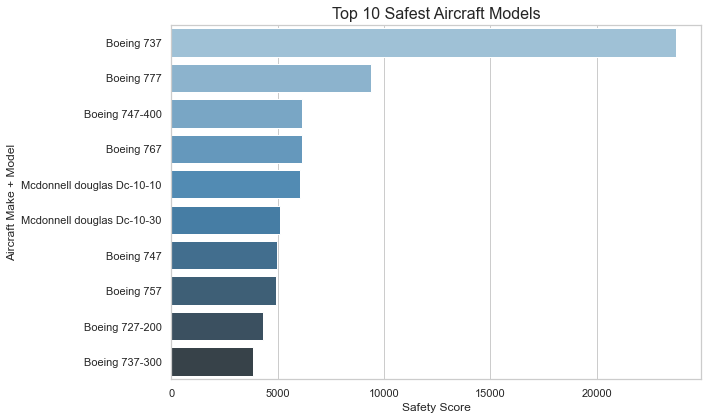

In [81]:
# Creating a visualization of the top 10 safest aircraft
# Loading the top_10_safest dataset
top_10_safest = pd.read_csv('top_10_safest_aircraft.csv')

# Combining Make and Model columns into a new Make_Model column
top_10_safest['Make_Model'] = top_10_safest['Make'] + ' ' + top_10_safest['Model']

# Setting the seaborn style for better visuals
sns.set(style="whitegrid")

# Creating the Horizontal Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_safest, y='Make_Model', x='Safety_Score', palette='Blues_d')

# Adding labels and title
plt.title('Top 10 Safest Aircraft Models', fontsize=16)
plt.xlabel('Safety Score', fontsize=12)
plt.ylabel('Aircraft Make + Model', fontsize=12)

# Showing the plot
plt.tight_layout()
plt.show()

**Key Insights**

  Out of the top 10 safest aircraft models, 8 are manufactured by Boeing. This demonstrates Boeing's significant reputation for safety in the commercial aviation industry.

  The Boeing 737 stands out dramatically with a Safety Score of 23,719, far higher than any other aircraft. Despite having a relatively high number of total fatal injuries (~1353), its massive number of uninjured passengers (~25,462) boosts its overall safety profile.

  Two models from McDonnell Douglas DC-10-10 and DC-10-30 also appear in the top 10, with decent safety scores (~6067 and ~5105). This indicates their historical reliability.

  In general, newer aircraft (e.g., Boeing 777) and larger planes (e.g., Boeing 747-400) tend to perform better in safety evaluations, likely due to advances in technology, materials, and engineering design.


#### **Step 4b : Relationship between Fatalities and Uninjured Passengers per Event**

In this section, we are focusing on extracting the number of fatalities and uninjured passengers for the Top 10 Safest Aircraft Models based on the safety score we computed earlier. This will help us visualize the relationship between fatalities and uninjured passengers per event.

In [82]:
# Mergeing the top_10_safest dataframe with the original data to get Fatalities and Uninjured for plotting
filtered_data = cleaned_data[cleaned_data['Model'].isin(top_10_safest['Model'])]

# Groupin the data by Make and Model to get Fatalities and Uninjured counts
grouped_filtered = filtered_data.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# Calculating Fatalities per Event (Fatalities + Serious Injuries)
grouped_filtered['Fatalities_Per_Event'] = grouped_filtered['Total.Fatal.Injuries'] + grouped_filtered['Total.Serious.Injuries']


#Creating a new csv of the grouped data for Tableau
grouped_filtered.to_csv('grouped_filtered.csv', index=False)


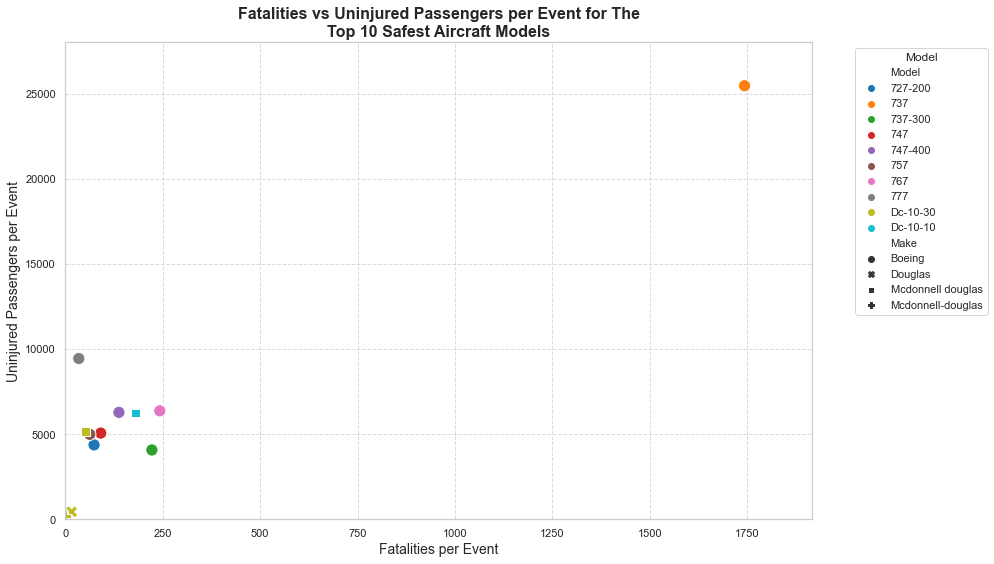

In [83]:

# Creating a Scatterplot with a better palette for categories
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=grouped_filtered,
    x='Fatalities_Per_Event',
    y='Total.Uninjured',
    hue='Model',  # The model will be represented by the color palette
    style='Make',
    palette='tab10',  # Tab10 is better for categorical colors
    s=150
)

# Title and labels
plt.title('Fatalities vs Uninjured Passengers per Event for The\nTop 10 Safest Aircraft Models', fontsize=16, weight='bold')
plt.xlabel('Fatalities per Event', fontsize=14)
plt.ylabel('Uninjured Passengers per Event', fontsize=14)


# Setting a tighter x and y limit 
plt.xlim(0, grouped_filtered['Fatalities_Per_Event'].max() * 1.1)
plt.ylim(0, grouped_filtered['Total.Uninjured'].max() * 1.1)

# Legend positioning
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

# Grid and layout adjustments
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


**Key Insights**

Boeing 737 is an outlier with very high fatalities and uninjured counts due to high traffic volume.

Boeing 777 shows excellent safety, with very low fatalities and a high number of uninjured passengers.

Other Boeing models (747-400, 767, 757) cluster together, indicating consistent and strong safety performance.

McDonnell Douglas models have moderate safety, showing slightly higher fatalities and fewer uninjured passengers.

Overall, newer aircraft models demonstrate better survival outcomes per event.


#### **Step 4c : Aircraft Damage Comparison by Make/Model for Top 10 Safest Aircraft**


This code analyzes aircraft damage for the top 10 safest aircraft models by grouping, pivoting, and preparing the data for visualization in Tableau This process allows us to clearly compare different damage types across aircraft models and prepare the data for effective visualization and insight generation.


In [84]:
# Filtering the data to focus on the top 10 safest aircraft models
filtered_damage_data = cleaned_data[cleaned_data['Model'].isin(top_10_safest['Model'])]

# Grouping by Make, Model, and Aircraft Damage and count occurrences
damage_grouped = filtered_damage_data.groupby(['Make', 'Model', 'Aircraft.damage']).size().reset_index(name='Count')

# Pivoting the table so each type of damage becomes a separate column
damage_pivot = damage_grouped.pivot_table(
    index=['Make', 'Model'],
    columns='Aircraft.damage',
    values='Count',
    fill_value=0
).reset_index()

#Checking the pivoted data
print(damage_pivot)

# Combining Make and Model into one column for cleaner plotting
damage_pivot['Make_Model'] = damage_pivot['Make'] + " " + damage_pivot['Model']

# Transferring the dataframe to CSV for Tableau
damage_pivot.to_csv('aircraft_damage_comparison.csv', index=False)


Aircraft.damage               Make     Model  Destroyed  Minor  Substantial
0                           Boeing   727-200          1     17           25
1                           Boeing       737         15    124          350
2                           Boeing   737-300          5     13           33
3                           Boeing       747          2     38           45
4                           Boeing   747-400          1      9           19
5                           Boeing       757          2     14           43
6                           Boeing       767          3     17           48
7                           Boeing       777          1     32           62
8                           Boeing  Dc-10-30          0      0            2
9                          Douglas  Dc-10-10          0      3            0
10                         Douglas  Dc-10-30          0      1            3
11               Mcdonnell douglas  Dc-10-10          1     16           19
12          

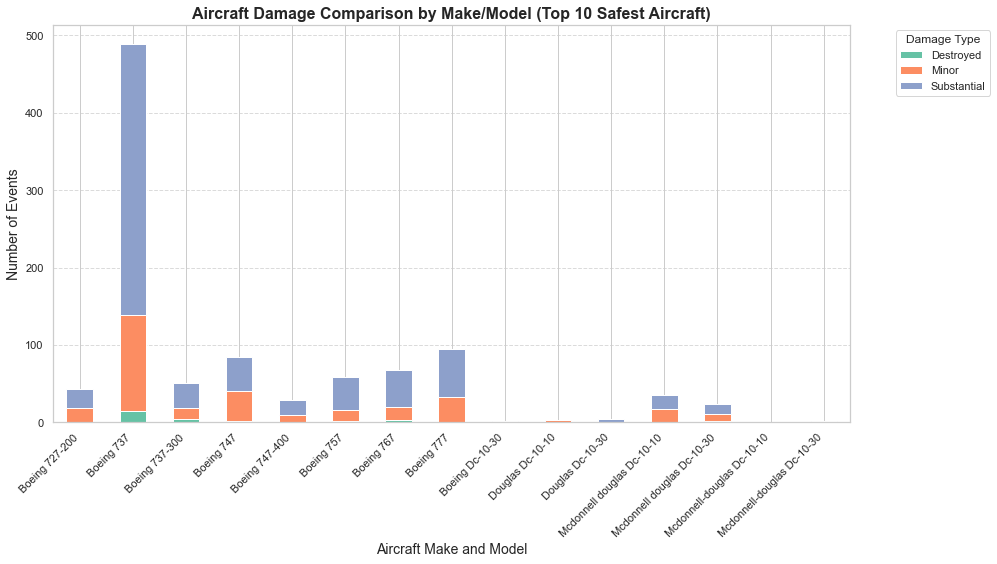

In [85]:
# Plotting a Bar Chart

#Setting a color map for different damage types
colors = plt.cm.Set2.colors  

# Plotting the chart
damage_pivot.set_index('Make_Model').plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=colors
)

plt.title('Aircraft Damage Comparison by Make/Model (Top 10 Safest Aircraft)', fontsize=16, weight='bold')
plt.xlabel('Aircraft Make and Model', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.legend(title='Damage Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Key Insights**

Boeing Models tend to have higher counts of Minor and Substantial damage compared to Douglas and Mcdonnell Douglas models. This could suggest more frequent incidents or that these models are more prone to certain damage types.

The Dc-10-30 variants from both Douglas and Mcdonnell Douglas have fewer Destroyed or Minor damage incidents, which might indicate better performance in terms of accident severity or simply fewer incidents.

Boeing 737 and Boeing 747 seem to be involved in incidents resulting in substantial damage, pointing to either higher usage or specific design factors contributing to increased damage.

The Boeing 737 appears to have higher numbers of Substantial and Minor damages, suggesting a need for deeper investigation into operational practices, maintenance, or design features.



### **Recommendations**


The primary recommendation is to prioritize the acquisition of the Boeing 777. This model consistently demonstrates outstanding safety across all measured dimensions, including very low fatality rates, a high number of uninjured passengers per event, and a strong overall safety score. The Boeing 777 has proven reliability in both survivability and structural integrity, making it the safest and most future-proof choice for fleet expansion.

As a secondary option, the Boeing 747-400 and Boeing 767 should also be considered. Both models have established strong safety records, exhibiting good durability with relatively few incidents involving major damage or fatalities. Their track records suggest they would add resilience and flexibility to the fleet. For newer Boeing 737 models, investment should be approached more cautiously. While these aircraft generally show good safety statistics, the sheer size of the global 737 fleet means there is inherently higher exposure to incidents, which could impact the perception of risk even if the aircraft themselves are safe.
 
Finally, it is recommended to avoid significant investment in McDonnell Douglas DC-10 variants. Although some DC-10 models appear in the safety rankings, they are older designs with a relatively higher rate of fatalities per event, which increases operational risk and potential maintenance burdens over time. Choosing to focus investments on the Boeing 777, with supplemental acquisitions of the Boeing 747-400 and 767, offers the best balance of safety, reliability, and operational sustainability.


